In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("Income Dataset.csv")


In [15]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  12 non-null     str    
 1   Level     12 non-null     float64
 2   Salary    14 non-null     int64  
dtypes: float64(1), int64(1), str(1)
memory usage: 468.0 bytes


In [16]:
data.describe()

,Level,Salary
count,12.000000,14.000000
mean,5.250000,213928.571429
std,2.808267,257556.405857
min,1.000000,45000.000000
25%,3.375000,68750.000000
50%,4.750000,130000.000000
75%,7.250000,200000.000000
max,10.000000,1000000.000000


In [17]:
data.isnull().sum()

Position    2
Level       2
Salary      0
dtype: int64

In [20]:
## remove the null values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
data.iloc[:,0:-1] = impute.fit_transform(data.iloc[:,0:-1])
data

,Position,Level,Salary
0,Business Analyst,1.0,45000
1,Junior Consultant,2.0,50000
2,Senior Consultant,3.0,60000
3,Manager,4.0,80000
4,Country Manager,5.0,110000
5,Region Manager,6.0,150000
6,Partner,7.0,200000
7,Senior Partner,8.0,300000
8,C-level,9.0,500000
9,CEO,10.0,1000000


In [23]:
data.iloc[:,1:].corr()

,Level,Salary
Level,1.000000,0.739396
Salary,0.739396,1.000000


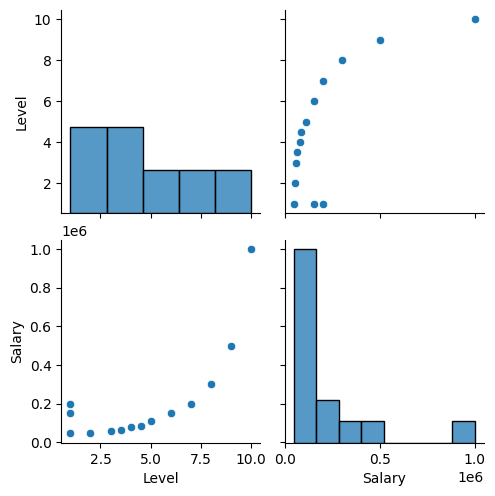

In [26]:
sns.pairplot(data.iloc[:,1:])

<Axes: >

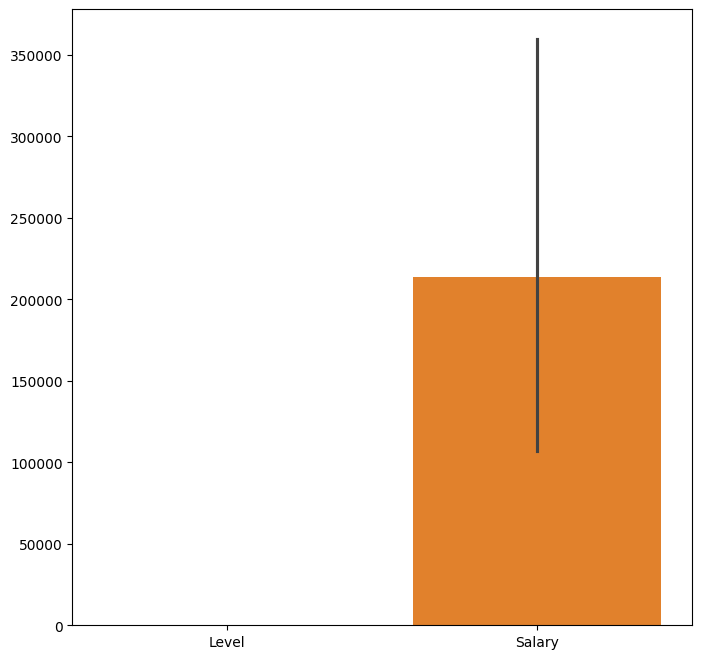

In [28]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(data.iloc[:,1:],ax = ax)

In [31]:
## As the difference between the magnitude is very high need to apply normalize
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,1:-1],data.iloc[:,2:])

In [33]:
X_train

,Level
8,9.0
12,3.5
1,2.0
9,10.0
11,1.0
4,5.0
5,6.0
13,4.5
10,1.0
3,4.0


In [35]:
y_train

,Salary
8,500000
12,65000
1,50000
9,1000000
11,200000
4,110000
5,150000
13,85000
10,150000
3,80000


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [42]:
X_train_norm

array([[ 1.51007609],
       [-0.37751902],
       [-0.89231769],
       [ 1.8532752 ],
       [-1.2355168 ],
       [ 0.13727964],
       [ 0.48047876],
       [-0.03431991],
       [-1.2355168 ],
       [-0.20591947]])

In [43]:
X_test_norm

array([[-1.2355168 ],
       [ 1.16687698],
       [ 0.82367787],
       [-0.54911858]])